<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/pca-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

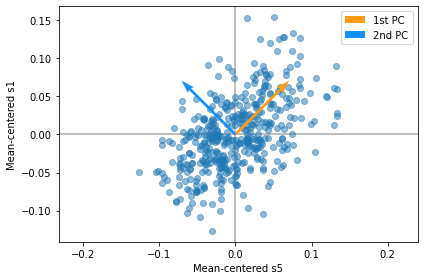

In [128]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
# The diabetes dataset from Sci-kit learn comes pre-standardized.
X, y = load_diabetes(return_X_y=True, as_frame=True)
# We'll take the features S5, and S1 from the diabetes dataset to demonstrate
# how PCA optomizes vectors to minimize l2 error and maximize variance
# in lower dimensions.
f1, f2 = 's5', 's1'
# We will mean-center the data to create a 0-centered origin.
X_centered = X[[f1, f2]].values - X[[f1, f2]].values.mean()

eig_vals, eig_vecs = np.linalg.eig(X_centered.T.dot(X_centered))
eig_vecs = eig_vecs.T

orange = '#FF9A13'
blue = '#1190FF'
colors = [orange, blue]
labels = ['1st PC', '2nd PC']

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=.5)
plt.gca().set_aspect('equal', 'datalim')
plt.axvline(x=0, color='#A9A9A9', zorder=0)
plt.axhline(y=0, color='#A9A9A9', zorder=0)


for i in range(len(eig_vecs)):
  x = np.concatenate([[0, 0], eig_vecs[i]])
  plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
              angles='xy', scale_units='xy', scale=10, 
              color=colors[i], label=labels[i] ,alpha=1)
  
plt.xlabel(f'Mean-centered {f1}')
plt.ylabel(f'Mean-centered {f2}')
plt.legend()
plt.tight_layout()

In [122]:
# The dot product of the first two principal components is zero which
# suggests they are orthogonal
eig_vecs[0].dot(eig_vecs[1])/(np.linalg.norm(eig_vecs[0])*np.linalg.norm(eig_vecs[1]))

0.0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


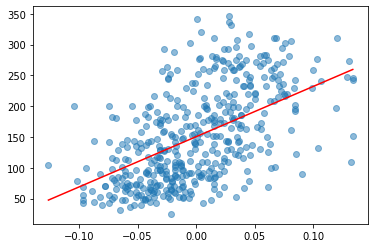

In [155]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# The diabetes dataset from Sci-kit learn comes pre-standardized.
X, y = load_diabetes(return_X_y=True, as_frame=True)
# We'll take the same two features S5, and S1 from the diabetes dataset to demonstrate
# how OLS optomizes l2 error to come up with a line that given vectors of S5, and S1,
# explains the target vector (disease progression after 1 year).
f1, f2 = 's5', 's1'

lr_model = LinearRegression().fit(X[[f1, f2]], y)
x1 = np.linspace(np.min(X[f1]), np.max(X[f1]), 1000)
x2 = np.linspace(np.min(X[f2]), np.max(X[f2]), 1000)
y_hat = lr_model.predict(np.vstack((x1, x2)).T)

plt.scatter(X[f1], y, alpha=.5)
plt.plot(x1, y_hat, color='r')

In [131]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64